In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [112]:
# Amazon Raw Data
data_path = ("amazon_cells_labelled.txt")
#positivewords.txt
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns = ['Sentence', 'Sentiment']
data_raw.head(30)  
data=data_raw

In [113]:
# rows count
print(data_raw['Sentiment'].value_counts())
data_raw.dtypes

1    500
0    500
Name: Sentiment, dtype: int64


Sentence     object
Sentiment     int64
dtype: object

In [114]:
#data_PWP_Path = ("positivewords.txt")
#positive_keywords = pd.read_csv(data_PWP_Path, delimiter= '\t')
#positive_keywords = positive_keywords["KEYWORDS"].tolist()


In [115]:
positive_keywords = ['ok','increase','better','thumbs','price','very',
            'significantly','strong','perfectly','surprised','amazed','sturdy','securely','right',
            'joy','finally','satisfied','better','super','well','nice', 'clear','finished','well','more',
            'pretty','easy','easier','fulfills','ideal','beautiful','best','works','comfortable',
            'ideal','recommend','good','happy','like', 'excellent', 'awesome','cool',
            'fantastic','love','reasonable','fine','great','impressed','wanted','important',
            'sturdiness','encourage','happier','comfort','excited','flawlessly','pleased','outperform','stars','adorable']



for keyPosStr in positive_keywords:
    data_raw[str(keyPosStr)] = data_raw.Sentence.str.contains(' '+str(keyPosStr)+' ',case=False)

In [116]:
data_raw['allSentence'] = data_raw.Sentence.str.isupper()
X= data_raw[positive_keywords + ['allSentence']]
y = data_raw['Sentiment']

In [117]:
#Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [118]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,  20],
       [ 89,  80]])

In [119]:
#Predictive accuracy
kf = KFold(10)
scores = cross_val_score(nb, X_test, y_test, cv=kf)
print('Cross-validated scores:', scores)
print('Cross-validation average:', scores.mean())


Cross-validated scores: [0.66666667 0.54545455 0.75757576 0.75757576 0.57575758 0.60606061
 0.66666667 0.84848485 0.57575758 0.63636364]
Cross-validation average: 0.6636363636363637


In [120]:
#data

# NLP Sentiment 

In [121]:

import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
def pre_process(text):
    clean_text=[char for char in text if char not in string.punctuation]
    clean_text="".join(clean_text)
    clean_text=[words for words in clean_text.split() if words not in stopwords.words('english')]
    return clean_text


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmetturanbalkan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
from sklearn.feature_extraction.text import CountVectorizer
x = CountVectorizer(analyzer=pre_process).fit(data['Sentence'])
x = x.transform(data['Sentence'])
y=data['Sentiment']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [124]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [125]:
pred=nb.predict(x_test)
y_pred_prob = nb.predict_proba(x_test)[:,1]
print("%"+str(accuracy_score(y_test,pred)))
print(confusion_matrix(y_test, pred))

%0.7433333333333333
[[109  62]
 [ 15 114]]


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred,target_names=['Positive',' Negative']))

             precision    recall  f1-score   support

   Positive       0.88      0.64      0.74       171
   Negative       0.65      0.88      0.75       129

avg / total       0.78      0.74      0.74       300



In [127]:
df2 = pd.DataFrame({'Actual': y_test,'Predict': pred, 'Predict_Prob': (y_pred_prob*100)})  
df2.head(15)

,Actual,Predict,Predict_Prob
545,1,1,81.980174
298,0,0,5.669909
109,0,0,40.471394
837,0,0,8.410304
194,0,0,23.276830
605,0,1,65.261700
246,1,1,95.598080
693,0,0,29.000327
802,1,1,99.583190
406,0,1,70.135249


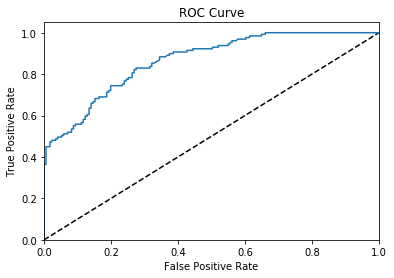

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(x_test)[:, 1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve')
plt.show()

In [129]:
def predictSentiment(strSentence):
    x = CountVectorizer(analyzer=pre_process).fit(data['Sentence'])
    strSentence=x.transform([strSentence])
    print(nb.predict(strSentence)[0])
    

In [130]:
predictSentiment("This fixes all the problems.")
predictSentiment("Don't buy this product")

1
0
